In [1]:
import numpy as np
import math as mat

# We start with the uncertainties in the faint end slope

* This is done in one of two ways:
<ol>
<li> Pick a center value. Find sum of squared distances from other values to that center value. Take the square root and then divide by the number of other values. </li>
<li> Take all values. Find mean, and find sum of squared distances of all values from that mean. Take square root and divide by N-1 </li>
</ol>

In [2]:
#we will have 3 values: one for alpha = -1.2, one for alpha = -1.3, one for alpha = -1.4 (in that order)
# all use a lower bound of 10^-3
#center value is index 1
# throughout the notebook, you will see multiplication by 0.85. This is because we want to calculate the uncertainty
#without gas included
values_SR = np.array([198.6,233.4,279.6])*0.85
values_LSS = np.array([135.3,158.1,188.4])*0.85

print(values_SR)
print(values_LSS)

[168.81 198.39 237.66]
[115.005 134.385 160.14 ]


In [3]:
# we start with method 1. We pick the center value as index 1, which was calculated with a slope of -1.3 
#and a bound of 10^-4 

def rms_center(center_ind,values):
    rms = 0.0
    for val in values:
        dist = val - values[center_ind]
        rms += dist**2
    
    rms = (rms/(len(values)-1))**0.5
    print('The uncertainty is {act:.1f}, or {rel:.2f}% of the center value'\
      .format(act = rms,rel=100*rms/values[center_ind]))
    
    return [rms,rms/values[center_ind]]

print('Lower bound and Alpha, Small Radii')
print('------------------------------ \n')
uncert_SR = rms_center(1,values_SR)
print('\n Lower bound and Alpha, Large Radii')
print('------------------------------ \n')
uncert_LSS = rms_center(1,values_LSS)

Lower bound and Alpha, Small Radii
------------------------------ 

The uncertainty is 34.8, or 17.52% of the center value

 Lower bound and Alpha, Large Radii
------------------------------ 

The uncertainty is 22.8, or 16.96% of the center value


In [4]:
# here's method 2. This just simply uses the mean.
def rms_mean(values):
    rms_2 = 0.0
    mean = np.mean(values)
    print(mean)

    for val in values:
        dist_sqrd = (val - mean)**2
        rms_2 += dist_sqrd

    rms_2 = (rms_2/(len(values)-1))**0.5

    print('The uncertainty is {act:.1f}, or {rel:.2f}% of the mean'\
          .format(act = rms_2,rel=100*rms_2/mean))
    
    return [rms_2,rms_2/mean]

uncert_mean_SR = rms_mean(values_SR)
uncert_mean_LSS = rms_mean(values_LSS)

print('\n' + str(100*uncert_mean_SR[0] / values_SR[1]))
print('\n' + str(100*uncert_mean_LSS[0] / values_LSS[1]))

201.62
The uncertainty is 34.5, or 17.13% of the mean
136.51
The uncertainty is 22.6, or 16.59% of the mean

17.409376062362846

16.84891243835407


**10<sup>-3</sup>** L*
* For small radii, we get an uncertainty of 34.5, which is 17.4% of 198
* For large radii, we get an uncertainty of 22.6, which is 16.9% of 134

In [5]:
#these next values are for a lower bound of 10^-4 and slope of +- 0.1
values_SR_minus4 = np.array([217.3,270.3,350.9])*0.85
values_LSS_minus4 = np.array([147.7,182.7,236.0])*0.85

uncert_mean_SR_minus4 = rms_mean(values_SR_minus4)
uncert_mean_LSS_minus4 = rms_mean(values_LSS_minus4)

print('\n' + str(100*uncert_mean_SR_minus4[0] / values_SR_minus4[1]))
print('\n' + str(100*uncert_mean_LSS_minus4[0] / values_LSS_minus4[1]))

237.57500000000002
The uncertainty is 57.2, or 24.07% of the mean
160.48
The uncertainty is 37.8, or 23.55% of the mean

24.888446814780778

24.337673782741867


In [6]:
#print(values_SR_minus4)
#print(values_LSS_minus4)

values_bound_alpha_SR = np.concatenate((values_SR,values_SR_minus4))
values_bound_alpha_LSS = np.concatenate((values_LSS,values_LSS_minus4))

uncert_mean_alphaBound_SR = rms_mean(values_bound_alpha_SR)
uncert_mean_alphaBound_LSS = rms_mean(values_bound_alpha_LSS)

219.5975
The uncertainty is 46.6, or 21.23% of the mean
148.49499999999998
The uncertainty is 30.8, or 20.74% of the mean


**10<sup>-4</sup>** L*
* For small radii, we get an uncertainty of 57.2, which is 24.9% of 229.8
* For large radii, we get an uncertainty of 37.8, which is 24.3% of 155.3

# Now, we're going to find the uncertainty in the Leuthaud slope. 
This uses the same functions as above

**First, we check how different slopes compare to the data in Leuthaud.**

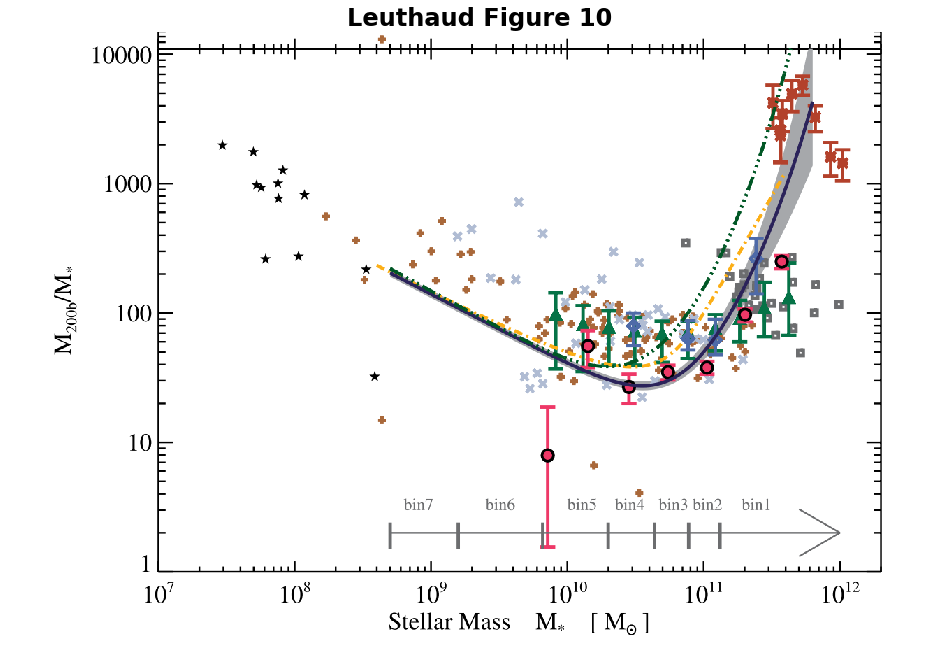

In [16]:
#loading in leuthaud figure for reference
import matplotlib.image as mpimg 

fig = plt.figure(figsize = (16,12))
ax = plt.subplot(111)
#reading in image 
img = mpimg.imread('./Figures/LeuthaudFig10.png') 

#outputting it
ax.set_axis_off()
ax.set_title('Leuthaud Figure 10',fontsize = 24,fontweight = "bold")
ax.imshow(img)

In [19]:
import pandas as pd
blue_line = pd.read_csv('./Data/LeuthBlueLine.csv',header=None)
leuth_points = pd.read_csv('./Data/LeuthLowLumPoints.csv',header = None)
blue_line.append([26,3.5E10])
print(blue_line)
#print(leuth_points)

               0           1
0   4.162825e+08  233.107619
1   4.392406e+08  224.455041
2   4.718445e+08  216.123633
3   5.068686e+08  208.101473
4   5.444724e+08  196.623081
5   5.848874e+08  189.324750
6   6.283024e+08  182.297321
7   6.749400e+08  175.530740
8   7.250394e+08  169.015322
9   7.929105e+08  159.692831
10  8.671670e+08  153.765292
11  9.483427e+08  145.283957
12  1.037117e+09  137.270433
13  1.134244e+09  132.175176
14  1.262848e+09  124.884702
15  1.381064e+09  117.996353
16  1.537681e+09  112.547202
17  1.712028e+09  106.339361
18  1.872292e+09  100.473930
19  2.047595e+09   95.833976
20  2.239271e+09   90.547997
21  2.493167e+09   85.553581
22  2.775850e+09   80.834645
23  3.035698e+09   76.375995
24  3.319993e+09   73.541041
25  3.763119e+09   68.182915
26  4.265546e+09   64.422104
27  4.966593e+09   59.728375
28  5.629598e+09   55.902762
29  6.324193e+09   52.322180
30  7.168296e+09   48.510039
31  8.271967e+09   44.975646
32  9.376388e+09   42.494895
33  1.062826e+

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [8]:
import matplotlib.pyplot as plt
import random

def sloped_line(L,slope):
    norm = 1.05e7
    y = norm * L**(slope)
    return y

lums = np.arange(1e7,5e10,1e8)

leuth_line_lums = blue_line[0]
leuth_line_mPerMstar = blue_line[1]

#slope of -0.58
five_eight_fracs = sloped_line(lums,-0.58)
#slope of -0.56
five_six_fracs = sloped_line(lums,-0.56)
#slope of -0.54
five_four_fracs = sloped_line(lums,-0.54)
#slope of -0.52
five_two_fracs = sloped_line(lums,-0.52)
#slope of -0.50
five_oh_fracs = sloped_line(lums,-0.50)

funcs = [five_eight_fracs,five_six_fracs,five_four_fracs,five_two_fracs,five_oh_fracs]
names = ['-0.58','-0.56','-0.54','-0.52','-0.50']
colors = ['g','k','m','y','purple']

fig,axs = plt.subplots(nrows = 5,ncols = 1,figsize = (14,20))
for i in range(len(funcs)):
    axs[i].plot(leuth_line_lums,leuth_line_mPerMstar,label = 'Leuthaud Main Fit')
    axs[i].scatter(leuth_points[0],leuth_points[1],color = 'r',alpha = 0.5,label = 'Leuthaud Low Lum Points')

    axs[i].set_xscale('log',basex=10)
    axs[i].set_yscale('log',basey=10)
    
    axs[i].set_xlim(1e7,5e10)
    axs[i].set_ylim(30,5e3)

    axs[i].plot(lums,funcs[i],color = colors[i],label = 'slope = '+ names[i],alpha = 0.7)
    axs[i].legend(bbox_to_anchor=(1.05, 1))
    
    axs[i].set_xlabel('Stellar Mass (Solar Masses)')
    axs[i].set_xlabel('Total Mass / Stellar Mass')
    axs[i].set_title('Slope of ' + names[i],fontsize = 16)

fig.subplots_adjust(hspace = 0.7)

plt.savefig('./Figures/Different_Leuthaud_Slopes.png')
plt.show()

<Figure size 1400x2000 with 5 Axes>

In [9]:
# the arrays are for values as follows: first value is for a M/L proportional to L^(-0.56), then our center value of 
# L^(-0.54), then L^(-0.52)

leuth_vals_SR = np.array([247.6,233.4,220.4])*0.85
leuth_vals_LSS = np.array([167.5,158.1,149.4])*0.85

print('Leuthaud Slope, Small Radii')
print('------------------------------ \n')

uncert_leuth_SR = rms_mean(leuth_vals_SR)

print('\n Leuthaud Slope, Large Radii')
print('------------------------------ \n')

uncert_leuth_LSS = rms_mean(leuth_vals_LSS)

print('\n' + str(100*uncert_leuth_SR[0] / leuth_vals_SR[1]))
print('\n' + str(100*uncert_leuth_LSS[0] / leuth_vals_LSS[1]))

Leuthaud Slope, Small Radii
------------------------------ 

198.73
The uncertainty is 11.6, or 5.82% of the mean

 Leuthaud Slope, Large Radii
------------------------------ 

134.58333333333334
The uncertainty is 7.7, or 5.72% of the mean

5.82879650786713

5.725651931784282


* SR: 11.6, or 5.8% of 198
* LSS: 7.7, or 5.7% of 134.4

# And finally, we're going to do the uncertainty in galaxy morphology.

* **For small radii, we consider three cases**:
<ol>
    
    <li> Base Case: <ul> <li> Bright: 10% Sp, 90% E </li>
        <li>Faint: 20% Sp, 80% E </li> </ul> </li>
    
    <li> Case 2: <ul> <li> Bright: 10% Sp, 90% E </li>
        <li> Faint: 30% Sp, 70% E </li> </ul> </li>
        
    <li> Case 3: <ul> <li> Bright: 10% Sp, 90% E  </li>
	<li> Faint: 10% Sp, 90% E </li> </ul> </li>
</ol>

* **For Large Scale Structure, we consider 6 cases**:
<ol> 
    
    <li> Base Case: <ul> <li> Bright: 50% Sp, 50% E </li>
	<li> Faint: 80% Sp, 20% E </li> </ul> </li>
     
     <li> Case 2 (more bright Sp): <ul> <li> Bright: 70% Sp, 30% E </li>
         <li>Faint: 80% Sp, 20% E </li> </ul> </li>
     
     <li> Case 3 (more faint E): <ul> <li> Bright: 50% Sp, 50% E</li>
     <li>Faint: 70% Sp, 30% E </li> </ul> </li>
     
     <li> Case 4 (more bright Sp, more faint E): <ul> <li>Bright: 70% Sp, 30% E</li>
     <li>Faint: 70% Sp, 30% E</li> </ul> </li>
     
     <li> Case 5 (more faint Sp):  <ul> <li>Bright: 50% Sp, 50% E</li>
     <li>Faint: 90% Sp, 10% E</li> </ul> </li>
     
     <li> Case 6 (more faint Sp, more bright Sp): <ul> <li> Bright: 70% Sp, 30% E</li>
	<li>Faint: 90% Sp, 10% E</li> </ul> </li>
</ol>
    
  
+ The values in each array are listed in the same order

In [10]:
morph_vals_SR = np.array([233.4,221.6,245.3])*0.85
morph_vals_LSS = np.array([158.1,156.0,169.9,167.8,146.2,144.1])*0.85

print('Morphology, Small Radii')
print('------------------------------ \n')

uncert_morph_SR = rms_mean(morph_vals_SR)

#print(uncert_morph_SR[0]/morph_vals_SR[1])

print('\n Morphology, Large Radii')
print('------------------------------ \n')

uncert_morph_LSS = rms_mean(morph_vals_LSS)

#print(uncert_morph_LSS[0]/morph_vals_LSS[1])

Morphology, Small Radii
------------------------------ 

198.41833333333332
The uncertainty is 10.1, or 5.08% of the mean

 Morphology, Large Radii
------------------------------ 

133.46416666666667
The uncertainty is 9.1, or 6.79% of the mean


In [11]:
print(morph_vals_SR)
print(morph_vals_LSS)

[198.39  188.36  208.505]
[134.385 132.6   144.415 142.63  124.27  122.485]


* SR: 10.1, or 5.1% of 198
* LSS: 9.1, or 6.8% of 134

## Finally, we obtain the total uncertainty for these three factors. We do so by adding all of these in Quadrature

In [12]:
# small radii
CENTER_VAL_SR = 233.4*0.85
CENTER_VAL_LSS = 158.1*0.85
M_L_0_UNCERT = 0.083

#print(uncert_mean_SR)
#print(uncert_leuth_SR)
#print(uncert_morph_SR)
#print()

total_uncert_SR = mat.sqrt((uncert_mean_SR[0]/CENTER_VAL_SR)**2 + \
                        (uncert_leuth_SR[0]/CENTER_VAL_SR)**2 + \
                        (uncert_morph_SR[0]/CENTER_VAL_SR)**2 + \
                          M_L_0_UNCERT**2)
print('Total Relative Uncertainty for Small Radii (no lower bound): {:.2f}%'\
      .format(total_uncert_SR*100))

total_uncert_LSS = mat.sqrt((uncert_mean_LSS[0]/CENTER_VAL_LSS)**2 + \
                        (uncert_leuth_LSS[0]/CENTER_VAL_LSS)**2 + \
                        (uncert_morph_LSS[0]/CENTER_VAL_LSS)**2 + \
                          M_L_0_UNCERT**2)
print('Total Relative Uncertainty for Large Radii (no lower bound): {:.2f}%'\
      .format(total_uncert_LSS*100))

Total Relative Uncertainty for Small Radii (no lower bound): 20.78%
Total Relative Uncertainty for Large Radii (no lower bound): 20.76%


In [13]:
#print(uncert_mean_alphaBound_SR)
#print(uncert_mean_alphaBound_LSS)

total_uncert_SR_bound = mat.sqrt((uncert_mean_alphaBound_SR[0]/CENTER_VAL_SR)**2 + \
                        (uncert_leuth_SR[0]/CENTER_VAL_SR)**2 + \
                        (uncert_morph_SR[0]/CENTER_VAL_SR)**2 + \
                          M_L_0_UNCERT**2)
print('Total Relative Uncertainty for Small Radii (with lower bound): {:.2f}%'\
      .format(total_uncert_SR_bound*100))

total_uncert_LSS_bound = mat.sqrt((uncert_mean_alphaBound_LSS[0]/CENTER_VAL_LSS)**2 + \
                        (uncert_leuth_LSS[0]/CENTER_VAL_LSS)**2 + \
                        (uncert_morph_LSS[0]/CENTER_VAL_LSS)**2 + \
                          M_L_0_UNCERT**2)
print('Total Relative Uncertainty for Large Radii (with lower bound): {:.2f}%'\
      .format(total_uncert_LSS_bound*100))


Total Relative Uncertainty for Small Radii (with lower bound): 26.09%
Total Relative Uncertainty for Large Radii (with lower bound): 25.93%
